#The effect of price salience on willingness to rent and perceived fairness of price in the Boston housing market

Team 10: Alima Abdirova, Dhruv Shah, Jessica Tong, Oumou Barry, Sonya Dreyer

>[The effect of price salience on willingness to rent and perceived fairness of price in the Boston housing market](#scrollTo=777lBxrwJVAd)

>>[Data Processing](#scrollTo=FSi8T0rFTcky)

>>[Exploratory Data Analysis](#scrollTo=uvTUjrisTZtW)

>>>[The distribution of respondents in treatment vs control group](#scrollTo=fRmkIBR4SrOm)

>>>[Distribution of respondents according to their location](#scrollTo=rZz2YW0VQuCk)

>>>[Distribution of respondents according to their Genders](#scrollTo=cFJ_hjz2RY9Q)

>>>[Distribution of respondents according to their Age](#scrollTo=KTZCLnmzR-C0)

>>>[Distribution of respondents according to their Employment Status](#scrollTo=YfCfS3-LPmBJ)

>>>[Distribution of respondents according to their Rent Budget](#scrollTo=pX_fls3bSdT7)

>>>[Likelihood to Lease by Apartment Type (Treatment vs Control)](#scrollTo=X454ZTgfQKEL)

>>>[Average Price Perception by Apartment Type (Treatment vs Control)](#scrollTo=IeFyUNo1R3Jx)

>>>[Count of Price Perception by Apartment Type](#scrollTo=_fZgZXcgSCJ7)

>>>[Count of Lease Likelihood by Apartment Type](#scrollTo=odjwBK6hSPtx)

>>[Average Treatment Effect](#scrollTo=_fwxNYy1_thw)

>>>[ATE Calculation for Likelihood of renting](#scrollTo=iWaeQatCT1rb)

>>>[ATE Calculation for Price perception](#scrollTo=xMesiUOxUAj8)

>>>[ATE Calculation for Price suggestion](#scrollTo=oTYC8HB5UH9u)

>>[Statistical power calculation](#scrollTo=QxOjJZuDDpPm)

>>>[Minimum Sample Size Calculation](#scrollTo=t3DVcTX7GmvZ)

>>[Conditional Average Treatment Effect](#scrollTo=OE64T1NUAjK1)

>>>[Conditional Average Treatment Effect for Male Respondents](#scrollTo=k0jRWrD8XQoq)

>>>[Conditional Average Treatment Effect for Female Respondents](#scrollTo=WgRcFzoyXpyH)

>>>[Conditional Average Treatment Effect for Respondents residing in Boston](#scrollTo=gLehm8lQXtPk)

>>>[Conditional Average Treatment Effect for Respondents residing out of Boston](#scrollTo=FlXDCzSAXx9T)

>>>[Conditional Average Treatment Effect for Respondents that are Unemployed](#scrollTo=Jtj6tZh3X84u)

>>>[Conditional Average Treatment Effect for Respondents that are Employed](#scrollTo=a8B_Iih6YPFR)

>>[Proportion Test](#scrollTo=n61WfT1Ib1ui)

>>[Regression Analysis](#scrollTo=Sw5vE8ILalZ8)

>>>[Regression Analysis for Likelihood to lease outcome](#scrollTo=XJf5FkAqdfus)

>>>[Regression Analysis for Likelihood to lease outcome with Fixed effects](#scrollTo=ytK7fiWHY_HH)

>>>[Regression Analysis for Price Perception outcome](#scrollTo=tlXozO7FdJh2)

>>>[Regression Analysis for Price Perception outcome with Fixed effects](#scrollTo=2z5x_H-eZY9f)

>>>[Regression Analysis for Price Suggestion outcome](#scrollTo=67a6sLSsdQAf)

>>>[Regression Analysis for Price Suggestion outcome with Fixed effects](#scrollTo=VLIRdSrzZm5-)

>>>[Scatterplot for Price Suggestion vs Age with the regression line](#scrollTo=0L6uZLE4CMhK)

>>>[Scatterplot for Price Suggestion vs Rent Budget with the regression line](#scrollTo=el7BxFlaCUWD)



## Data Processing

In [ ]:
!pip install pingouin
!pip install Stargazer
!pip install pyfixest

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.power import TTestPower
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from pyfixest.estimation import feols
from pyfixest.utils import get_data
from pyfixest.summarize import etable
from stargazer.stargazer import Stargazer

In [3]:
!git clone https://github.com/dhruvds58/boston-housing-business-experiment


Cloning into 'boston-housing-business-experiment'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 43.22 KiB | 1.66 MiB/s, done.


In [4]:
!wget https://github.com/dhruvds58/boston-housing-business-experiment/blob/main/boston_housing_survey_results.xlsx


--2024-03-08 03:04:50--  https://github.com/dhruvds58/boston-housing-business-experiment/blob/main/boston_housing_survey_results.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3729 (3.6K) [text/plain]
Saving to: ‘boston_housing_survey_results.xlsx’

boston_housing_surv 100%[===================>]   3.64K  --.-KB/s    in 0s      

2024-03-08 03:04:51 (21.3 MB/s) - ‘boston_housing_survey_results.xlsx’ saved [3729/3729]



In [5]:
df = pd.read_excel('/content/boston-housing-business-experiment/boston_housing_survey_results.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Duration (in seconds)           79 non-null     int64         
 1   RecordedDate                    79 non-null     datetime64[ns]
 2   ResponseId                      79 non-null     object        
 3   Q1_Treatment_Lease              35 non-null     object        
 4   Q2_Treatment_Price_Perception   35 non-null     object        
 5   Q3_Treatment_Price_Suggestion   17 non-null     float64       
 6   Q4_Treatment_Lease              35 non-null     object        
 7   Q5_Treatment_Price_Perception   35 non-null     object        
 8   Q6_Treatment_Price_Suggestion   18 non-null     float64       
 9   Q7_Treatment_Lease              35 non-null     object        
 10  Q8_Treatment_Price_Perception   35 non-null     object        
 11  Q9_Treat

In [7]:
df.head()

,Duration (in seconds),RecordedDate,ResponseId,Q1_Treatment_Lease,Q2_Treatment_Price_Perception,Q3_Treatment_Price_Suggestion,Q4_Treatment_Lease,Q5_Treatment_Price_Perception,Q6_Treatment_Price_Suggestion,Q7_Treatment_Lease,...,Q13_Control_Lease,Q14_Control_Price_Perception,Q15_Control_Price_Suggestion,email,age,gender,location_boston,employment_status,rent_budget,Treatment
0,339,2024-02-27 13:04:41.032,R_60cPchGG1ACUq0t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Somewhat unlikely,Overpriced,2600.0,bychan@bu.edu,22,Man,Yes,Employed Part-time,1700.0,Block2
1,188,2024-02-27 13:31:33.026,R_6S90sCDjHlApWi5,Extremely likely,Fairly priced,NaN,Somewhat likely,Overpriced,900.0,Somewhat unlikely,...,NaN,NaN,NaN,neehak@bu.edu,23,Woman,Yes,Employed Part-time,1000.0,Block1
2,211,2024-02-27 13:32:06.831,R_7K2bh7BIOYgSjH8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Neither likely nor unlikely,Fairly priced,NaN,rifat.maxytow@gmail.com,23,Transgender Man,Yes,Employed Full-time,900.0,Block2
3,240,2024-02-27 13:34:30.039,R_1Jyl3F1WFVWVuqg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Neither likely nor unlikely,Overpriced,2200.0,8250139@gmail.com,20,Man,Yes,Unemployed,3500.0,Block2
4,199,2024-02-27 13:39:37.195,R_7g2BZfZeoi7Nhu7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Extremely unlikely,Overpriced,2400.0,prudhvir@bu.edu,25,Man,Yes,Employed Part-time,900.0,Block2


In [8]:
# Concating treatment and control questions together for better analysis
treatment_group = pd.concat([df.loc[:, 'Duration (in seconds)':'Q15_Treatment_Price_Suggestion'], df[['email', 'age', 'gender', 'location_boston', 'employment_status', 'rent_budget', 'Treatment']]], axis=1)
control_group = pd.concat([df.loc[:, 'Duration (in seconds)': 'ResponseId'], df.loc[:, 'Q1_Control_Lease':'Q15_Control_Price_Suggestion'], df[['email', 'age', 'gender', 'location_boston', 'employment_status', 'rent_budget', 'Treatment']]], axis=1)

In [9]:
# Defining treatment and control groups
treatment_group= treatment_group[treatment_group['Treatment'] == "Block1"]
control_group= control_group[control_group['Treatment'] == "Block2"]

In [10]:
# Renaming columns for easier understandability
control_group.rename(columns={'Q1_Control_Lease': 'Q1_Treatment_Lease',
                              'Q2_Control_Price_Perception': 'Q2_Treatment_Price_Perception',
                              'Q3_Control_Price_Suggestion': 'Q3_Treatment_Price_Suggestion',
                              'Q4_Control_Lease': 'Q4_Treatment_Lease',
                              'Q5_Control_Price_Perception': 'Q5_Treatment_Price_Perception',
                              'Q6_Control_Price_Suggestion': 'Q6_Treatment_Price_Suggestion',
                              'Q7_Control_Lease': 'Q7_Treatment_Lease',
                              'Q8_Control_Price_Perception': 'Q8_Treatment_Price_Perception',
                              'Q9_Control_Price_Suggestion': 'Q9_Treatment_Price_Suggestion',
                              'Q10_Control_Lease': 'Q10_Treatment_Lease',
                              'Q11_Control_Price_Perception': 'Q11_Treatment_Price_Perception',
                              'Q12_Control_Price_Suggestion': 'Q12_Treatment_Price_Suggestion',
                               'Q13_Control_Lease': 'Q13_Treatment_Lease',
                               'Q14_Control_Price_Perception': 'Q14_Treatment_Price_Perception',
                              'Q15_Control_Price_Suggestion': 'Q15_Treatment_Price_Suggestion'
                               }, inplace=True)

In [11]:
# Changing column names
cleaned_df = pd.concat([treatment_group, control_group], axis=0)
cleaned_df.rename(columns={x: x.replace("_Treatment", "") for x in cleaned_df.columns}, inplace=True)
cleaned_df

,Duration (in seconds),RecordedDate,ResponseId,Q1_Lease,Q2_Price_Perception,Q3_Price_Suggestion,Q4_Lease,Q5_Price_Perception,Q6_Price_Suggestion,Q7_Lease,...,Q13_Lease,Q14_Price_Perception,Q15_Price_Suggestion,email,age,gender,location_boston,employment_status,rent_budget,Treatment
1,188,2024-02-27 13:31:33.026,R_6S90sCDjHlApWi5,Extremely likely,Fairly priced,NaN,Somewhat likely,Overpriced,900.0,Somewhat unlikely,...,Somewhat unlikely,Fairly priced,NaN,neehak@bu.edu,23,Woman,Yes,Employed Part-time,1000.0,Block1
5,191,2024-02-27 13:44:05.415,R_77Ewar7atlUvSEb,Extremely likely,Fairly priced,NaN,Somewhat likely,Fairly priced,NaN,Somewhat likely,...,Somewhat unlikely,Overpriced,1800.0,artemv@bu.edu,23,Man,Yes,Employed Full-time,1000.0,Block1
7,322,2024-02-27 13:49:48.731,R_65TrFWIEO8xosXF,Somewhat likely,Fairly priced,NaN,Somewhat unlikely,Overpriced,845.0,Neither likely nor unlikely,...,Extremely unlikely,Overpriced,2200.0,loreleil@bu.edu,26,Woman,Yes,Unemployed,1300.0,Block1
11,102,2024-02-27 14:48:47.512,R_6b18HmwhmiYYmHv,Extremely likely,Fairly priced,NaN,Extremely likely,Fairly priced,NaN,Somewhat unlikely,...,Extremely unlikely,Overpriced,2000.0,skylar80031@gmail.com,22,Woman,Yes,Employed Part-time,NaN,Block1
12,858,2024-02-27 14:54:41.324,R_6SjfJWeVI5ShnKg,Extremely unlikely,Overpriced,800.0,Extremely unlikely,Fairly priced,NaN,Somewhat likely,...,Extremely likely,Fairly priced,NaN,8s0g37we2@mozmail.com,19,Woman,Yes,Unemployed,NaN,Block1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,33819,2024-02-28 19:47:40.692,R_7YLDMFaeIPdtuoJ,Extremely likely,Underpriced,3500.0,Somewhat likely,Underpriced,3250.0,Extremely likely,...,Extremely unlikely,Overpriced,2000.0,abhishek.alchemist@gmail.com,31,Man,No,Employed Full-time,3000.0,Block2
71,415,2024-02-29 11:28:39.383,R_3BkRubU5qMzp0Bz,Somewhat unlikely,Overpriced,600.0,Somewhat likely,Fairly priced,NaN,Extremely likely,...,Extremely unlikely,Overpriced,1500.0,kiakane23@gmail.com,22,Woman,No,Employed Part-time,1700.0,Block2
73,246,2024-02-29 11:53:43.640,R_5L4PRTE6pdGMi7y,Extremely likely,Fairly priced,NaN,Extremely likely,Fairly priced,NaN,Extremely unlikely,...,Extremely unlikely,Overpriced,1700.0,barrie.abdul7@gmail.com,25,Man,No,Unemployed,1000.0,Block2
76,307,2024-02-29 13:05:07.040,R_3zGgdj2iIu6XXum,Neither likely nor unlikely,Fairly priced,NaN,Somewhat likely,Fairly priced,NaN,Somewhat unlikely,...,Extremely unlikely,Fairly priced,NaN,mcherif360@gmail.com,19,Woman,No,Unemployed,NaN,Block2


In [12]:
# Breaking Questions by the 5 apartments
apt1= pd.concat([cleaned_df.loc[:, : 'Q3_Price_Suggestion'], cleaned_df.loc[:, 'email': 'Treatment']], axis=1)
apt2= pd.concat([cleaned_df.loc[:, : 'ResponseId'], cleaned_df.loc[:, 'Q4_Lease': 'Q6_Price_Suggestion'], cleaned_df.loc[:, 'email': 'Treatment']], axis=1)
apt3= pd.concat([cleaned_df.loc[:, : 'ResponseId'], cleaned_df.loc[:, 'Q7_Lease': 'Q9_Price_Suggestion'], cleaned_df.loc[:, 'email': 'Treatment']], axis=1)
apt4= pd.concat([cleaned_df.loc[:, : 'ResponseId'], cleaned_df.loc[:, 'Q10_Lease': 'Q12_Price_Suggestion'], cleaned_df.loc[:, 'email': 'Treatment']], axis=1)
apt5= pd.concat([cleaned_df.loc[:, : 'ResponseId'], cleaned_df.loc[:, 'Q13_Lease': 'Q15_Price_Suggestion'], cleaned_df.loc[:, 'email': 'Treatment']], axis=1)

In [13]:
# Making a new column for apartments
apt1["apt"]= 1
apt2["apt"]= 2
apt3["apt"]= 3
apt4["apt"]= 4
apt5["apt"]= 5

In [14]:
for i in [apt1, apt2, apt3, apt4, apt5]:
  i.columns = ['duration_sec', 'recorded_date', 'response_id', 'Q1_lease',
       'Q2_price_perception', 'Q3_price_suggestion', 'email', 'age', 'gender',
       'location_boston', 'employment_status', 'rent_budget', 'treatment',
       'apt']

In [15]:
# Concatenating all apartments into one big dataframe
updated_df = pd.concat([apt1, apt2, apt3, apt4, apt5], axis= 0)
updated_df

,duration_sec,recorded_date,response_id,Q1_lease,Q2_price_perception,Q3_price_suggestion,email,age,gender,location_boston,employment_status,rent_budget,treatment,apt
1,188,2024-02-27 13:31:33.026,R_6S90sCDjHlApWi5,Extremely likely,Fairly priced,NaN,neehak@bu.edu,23,Woman,Yes,Employed Part-time,1000.0,Block1,1
5,191,2024-02-27 13:44:05.415,R_77Ewar7atlUvSEb,Extremely likely,Fairly priced,NaN,artemv@bu.edu,23,Man,Yes,Employed Full-time,1000.0,Block1,1
7,322,2024-02-27 13:49:48.731,R_65TrFWIEO8xosXF,Somewhat likely,Fairly priced,NaN,loreleil@bu.edu,26,Woman,Yes,Unemployed,1300.0,Block1,1
11,102,2024-02-27 14:48:47.512,R_6b18HmwhmiYYmHv,Extremely likely,Fairly priced,NaN,skylar80031@gmail.com,22,Woman,Yes,Employed Part-time,NaN,Block1,1
12,858,2024-02-27 14:54:41.324,R_6SjfJWeVI5ShnKg,Extremely unlikely,Overpriced,800.0,8s0g37we2@mozmail.com,19,Woman,Yes,Unemployed,NaN,Block1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,33819,2024-02-28 19:47:40.692,R_7YLDMFaeIPdtuoJ,Extremely unlikely,Overpriced,2000.0,abhishek.alchemist@gmail.com,31,Man,No,Employed Full-time,3000.0,Block2,5
71,415,2024-02-29 11:28:39.383,R_3BkRubU5qMzp0Bz,Extremely unlikely,Overpriced,1500.0,kiakane23@gmail.com,22,Woman,No,Employed Part-time,1700.0,Block2,5
73,246,2024-02-29 11:53:43.640,R_5L4PRTE6pdGMi7y,Extremely unlikely,Overpriced,1700.0,barrie.abdul7@gmail.com,25,Man,No,Unemployed,1000.0,Block2,5
76,307,2024-02-29 13:05:07.040,R_3zGgdj2iIu6XXum,Extremely unlikely,Fairly priced,NaN,mcherif360@gmail.com,19,Woman,No,Unemployed,NaN,Block2,5


In [16]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 1 to 78
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   duration_sec         395 non-null    int64         
 1   recorded_date        395 non-null    datetime64[ns]
 2   response_id          395 non-null    object        
 3   Q1_lease             395 non-null    object        
 4   Q2_price_perception  395 non-null    object        
 5   Q3_price_suggestion  211 non-null    float64       
 6   email                395 non-null    object        
 7   age                  395 non-null    int64         
 8   gender               395 non-null    object        
 9   location_boston      395 non-null    object        
 10  employment_status    395 non-null    object        
 11  rent_budget          280 non-null    float64       
 12  treatment            395 non-null    object        
 13  apt                  395 non-null   

In [17]:
# Imputing price suggestion column with fairly priced answers
updated_df['Q2_price_perception'] = updated_df['Q2_price_perception'].fillna('Not specified')
# Iterate over the DataFrame
for index, row in updated_df.iterrows():
    if row['Q2_price_perception'] == 'Fairly priced':
        if row['apt'] == 1:
            updated_df.loc[index, 'Q3_price_suggestion'] = 1123
        elif row['apt'] == 2:
            updated_df.loc[index, 'Q3_price_suggestion'] = 1178.78
        elif row['apt'] == 3:
            updated_df.loc[index, 'Q3_price_suggestion'] = 1950
        elif row['apt'] == 4:
            updated_df.loc[index, 'Q3_price_suggestion'] = 2649
        else:
            updated_df.loc[index, 'Q3_price_suggestion'] = 2985

In [18]:
# Changing the treatment column to 1s and 0s
updated_df['treatment']= updated_df['treatment'].apply(lambda x: 1 if x == 'Block1' else 0)

In [19]:
# Replacing null values in the rent_budget column with nan
updated_df['rent_budget'] = updated_df['rent_budget'].fillna(np.nan)

In [20]:
# Changing location_boston column to 1s and 0s
updated_df['location_boston']= updated_df['location_boston'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
# Mapping Q1 to numbers
updated_df['Q1_lease'] = updated_df['Q1_lease'].replace({
    "Extremely unlikely": 1,
    "Somewhat unlikely": 2,
    "Neither likely nor unlikely": 3,
    "Somewhat likely": 4,
    "Extremely likely": 5
}, inplace=False)

In [22]:
# Mapping Q2 to numbers
updated_df['Q2_price_perception'] = updated_df['Q2_price_perception'].replace({
    "Underpriced": 1,
    "Fairly priced": 2,
    "Overpriced": 3
}, inplace=False)

In [23]:
# Mapping employment status to numbers
updated_df['employment_status'] = updated_df['employment_status'].replace({
    "Unemployed": 1,
    "Employed Full-time": 2,
    "Employed": 3
}, inplace=False)

In [24]:
# Changing data types accordingly
updated_df = updated_df.astype({
     'Q1_lease': 'int',
    'Q2_price_perception': 'int',
    'email': 'string',
    'gender': 'category',
    'location_boston': 'category',
    'employment_status': 'category',
    'rent_budget': 'float',
    'treatment': 'category',
    'apt': 'category'})

In [25]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 1 to 78
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   duration_sec         395 non-null    int64         
 1   recorded_date        395 non-null    datetime64[ns]
 2   response_id          395 non-null    object        
 3   Q1_lease             395 non-null    int64         
 4   Q2_price_perception  395 non-null    int64         
 5   Q3_price_suggestion  395 non-null    float64       
 6   email                395 non-null    string        
 7   age                  395 non-null    int64         
 8   gender               395 non-null    category      
 9   location_boston      395 non-null    category      
 10  employment_status    395 non-null    category      
 11  rent_budget          280 non-null    float64       
 12  treatment            395 non-null    category      
 13  apt                  395 non-null   

## Exploratory Data Analysis

### The distribution of respondents in treatment vs control group

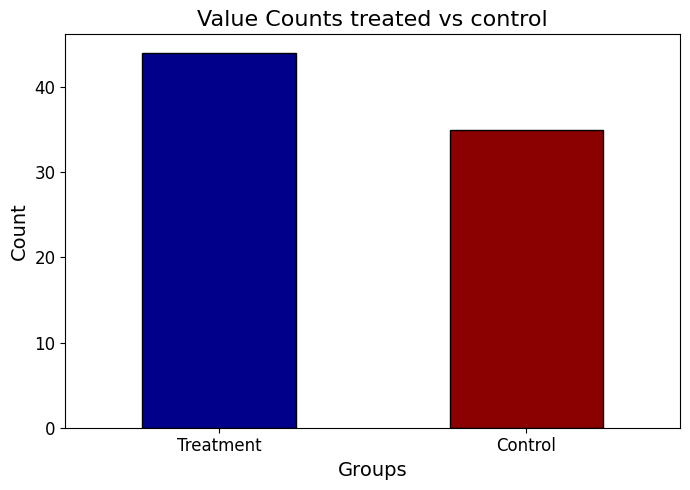

In [26]:
# Getting the value counts of 'location_boston'
value_counts = df['Treatment'].value_counts()

# Creating a bar plot
plt.figure(figsize=(7, 5))
value_counts.plot(kind='bar', color=['darkblue','darkred'], edgecolor='black')
plt.title('Value Counts treated vs control', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Groups', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Treatment', 'Control'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Distribution of respondents according to their location

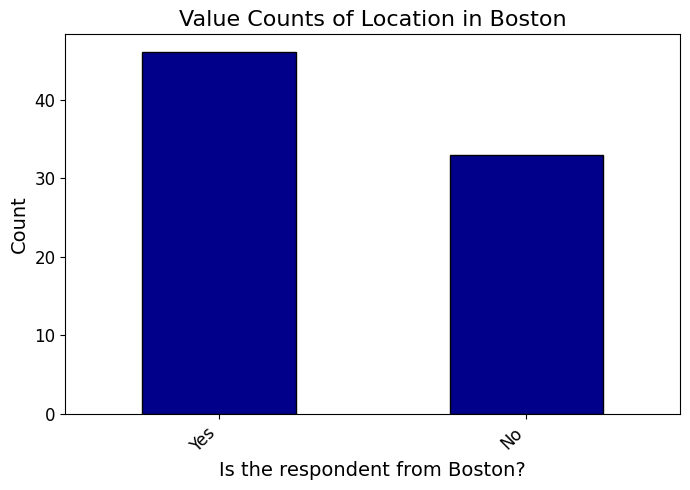

In [27]:
# Getting the value counts of 'location_boston'
value_counts = df['location_boston'].value_counts()

# Creating a bar plot
plt.figure(figsize=(7, 5))
value_counts.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title('Value Counts of Location in Boston', fontsize=16)
plt.xlabel('Is the respondent from Boston?', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Distribution of respondents according to their Genders

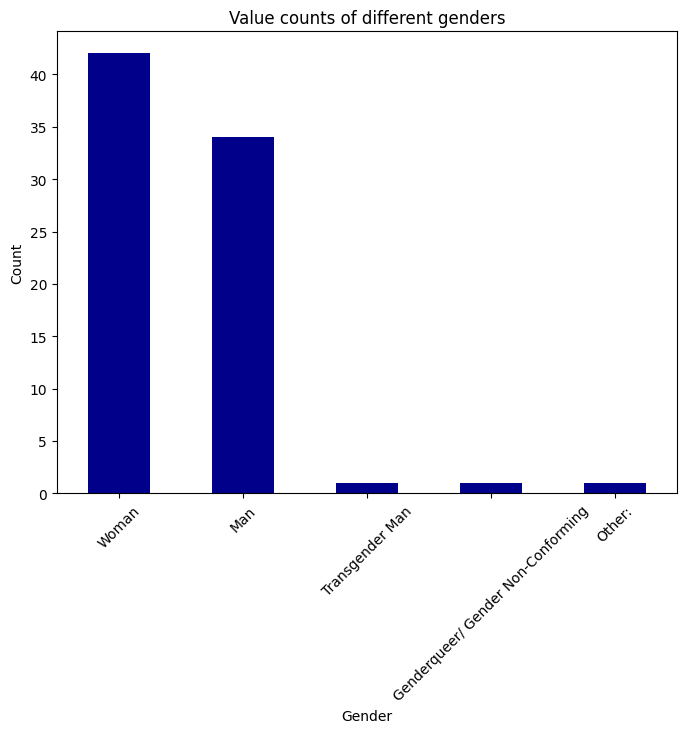

In [28]:
# Get the value counts of 'location_boston'
value_counts = df['gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='darkblue')
plt.title('Value counts of different genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of respondents according to their Age

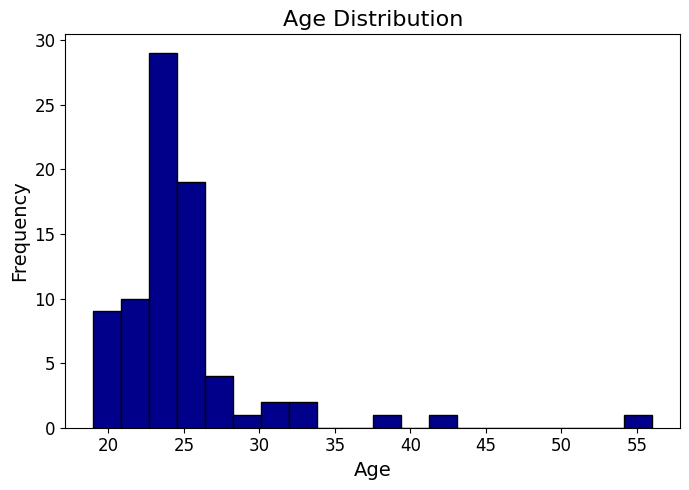

In [29]:
# Creating a histogram of age distribution
plt.figure(figsize=(7, 5))
plt.hist(df['age'], bins=20, color='darkblue', edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Distribution of respondents according to their Employment Status

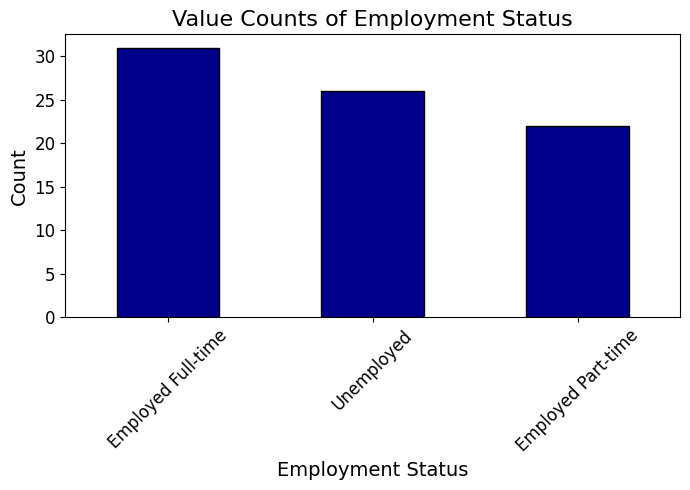

In [30]:
value_counts = df['employment_status'].value_counts()

plt.figure(figsize=(7, 5))
value_counts.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title('Value Counts of Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Distribution of respondents according to their Rent Budget

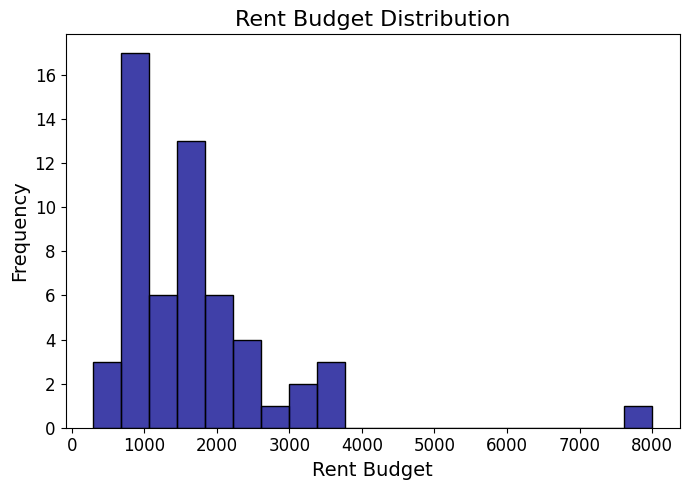

In [31]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='rent_budget', bins=20, color='darkblue', edgecolor='black')
plt.title('Rent Budget Distribution', fontsize=16)
plt.xlabel('Rent Budget', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Likelihood to Lease by Apartment Type (Treatment vs Control)

<Figure size 1000x600 with 0 Axes>

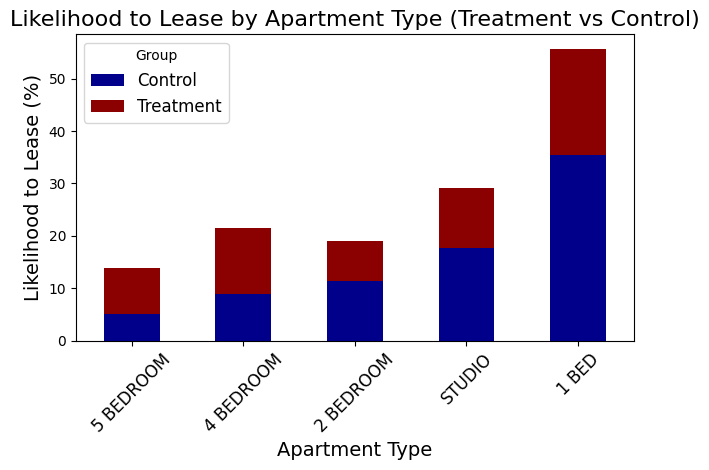

In [32]:
# Filtering data where lease is 1 (assuming 1 indicates lease)
leased_data = updated_df[updated_df['Q1_lease'] == 1]

# Grouping the data by apartment type and treatment
grouped_data = leased_data.groupby(['apt', 'treatment']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(updated_df.groupby('apt').size(), axis=0) * 100

# Plotting the graph
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, color=['darkblue', 'darkred'])
plt.title('Likelihood to Lease by Apartment Type (Treatment vs Control)', fontsize=16)
plt.xlabel('Apartment Type', fontsize=14)
plt.ylabel('Likelihood to Lease (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.xticks(ticks=range(len(grouped_data.index)), labels=['5 BEDROOM', '4 BEDROOM', '2 BEDROOM', 'STUDIO', '1 BED'])
plt.legend(title='Group', labels=['Control', 'Treatment'], fontsize=12)
plt.tight_layout()
plt.show()


### Average Price Perception by Apartment Type (Treatment vs Control)

<ipython-input-33-9e0281318d19>:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, color in zip(legend.legendHandles, ['darkblue', 'darkred']):


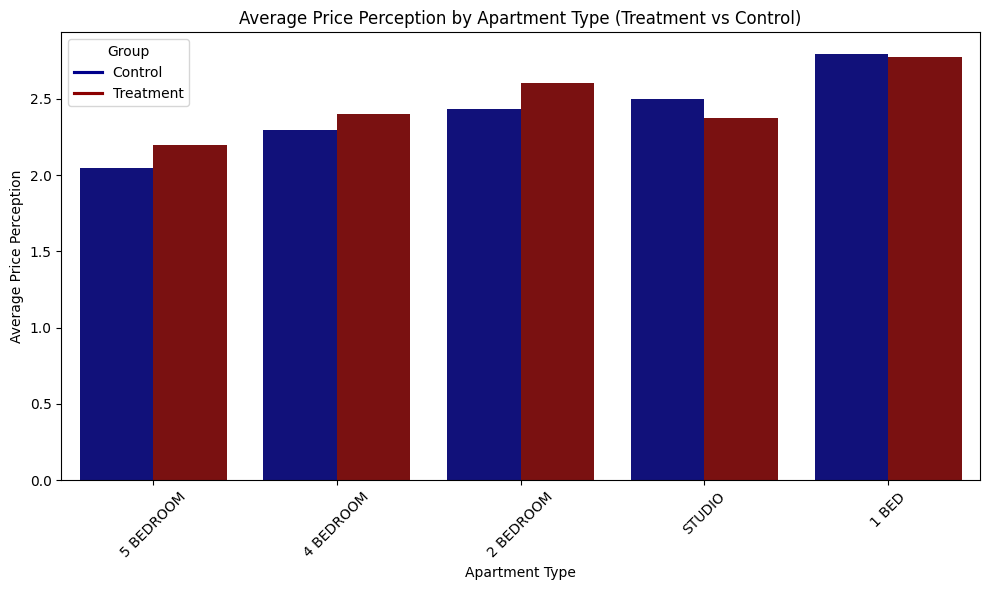

In [33]:
# Group the data by apartment type and treatment for price perception
price_perception_grouped = updated_df.groupby(['apt', 'treatment'])['Q2_price_perception'].mean().reset_index()

# Plot the graph for price perception with side-by-side bars
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='apt', y='Q2_price_perception', hue='treatment', data=price_perception_grouped,
                      palette=['darkblue', 'darkred'])
plt.title('Average Price Perception by Apartment Type (Treatment vs Control)')
plt.xlabel('Apartment Type')
plt.ylabel('Average Price Perception')
plt.xticks(rotation=45)
plt.xticks(ticks=range(len(price_perception_grouped['apt'].unique())),
           labels=['5 BEDROOM', '4 BEDROOM', '2 BEDROOM', 'STUDIO', '1 BED'])

# Customize legend colors
legend = plt.legend(title='Group', labels=['Control', 'Treatment'])
for handle, color in zip(legend.legendHandles, ['darkblue', 'darkred']):
    handle.set_color(color)

plt.grid(False)

plt.tight_layout()
plt.show()

### Count of Price Perception by Apartment Type

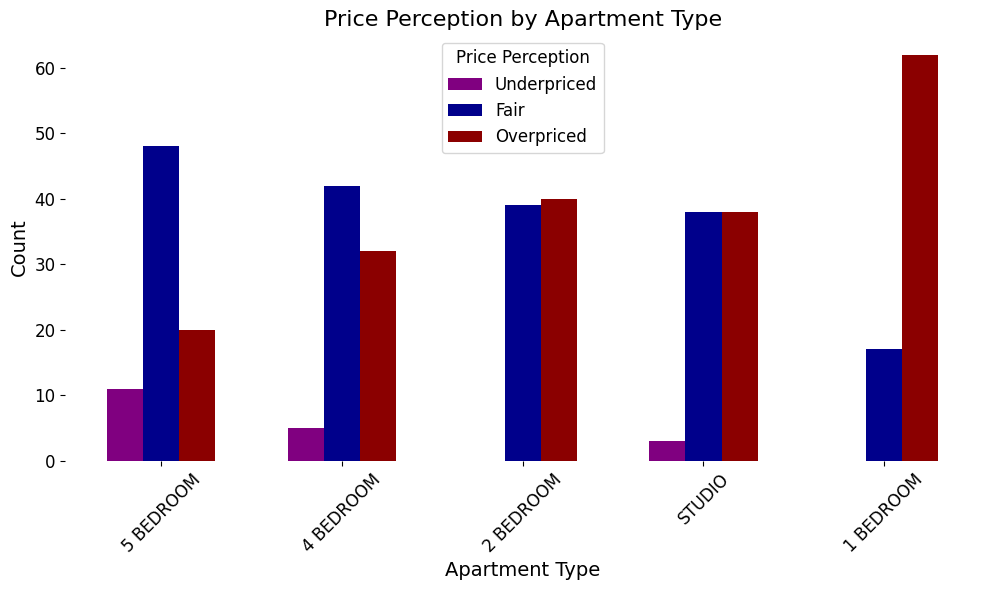

In [34]:
# Group the data by apartment type and price perception
price_perception_grouped = updated_df.groupby(['apt', 'Q2_price_perception']).size().unstack(fill_value=0)

# Plot the graph
plt.figure(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.2
x = np.arange(len(price_perception_grouped))

# Define colors for each price perception category
colors = ['#800080', '#00008B', '#8B0000']  # Purple, dark blue, and dark red

# Plotting bars for each price perception category
plt.bar(x - bar_width, price_perception_grouped[1], width=bar_width, label='Underpriced', color=colors[0])
plt.bar(x, price_perception_grouped[2], width=bar_width, label='Fair', color=colors[1])
plt.bar(x + bar_width, price_perception_grouped[3], width=bar_width, label='Overpriced', color=colors[2])

plt.title('Price Perception by Apartment Type', fontsize=16)
plt.xlabel('Apartment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=x, labels=['5 BEDROOM', '4 BEDROOM', '2 BEDROOM', 'STUDIO', '1 BEDROOM'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Price Perception', fontsize=12, title_fontsize=12)
plt.grid(False)

# Remove gridlines
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


### Count of Lease Likelihood by Apartment Type

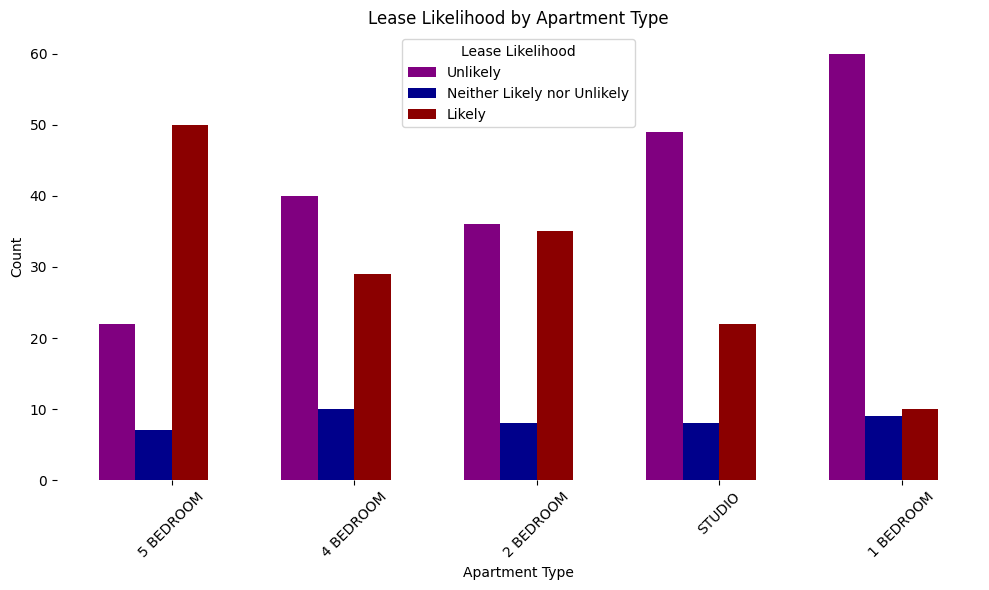

In [35]:
# Group the data by apartment type and Q1_lease
q1_lease_grouped = updated_df.groupby(['apt', 'Q1_lease']).size().unstack(fill_value=0)

# Plot the graph
plt.figure(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.2
x = np.arange(len(q1_lease_grouped))

# Define colors for each lease likelihood category
colors = ['#800080', '#00008B', '#8B0000']  # Purple, dark blue, and dark red

# Plotting bars for each Q1_lease category
plt.bar(x - 1.5 * bar_width, q1_lease_grouped[1] + q1_lease_grouped[2], width=bar_width, label='Unlikely', color=colors[0])
plt.bar(x - 0.5 * bar_width, q1_lease_grouped[3], width=bar_width, label='Neither Likely nor Unlikely', color=colors[1])
plt.bar(x + 0.5 * bar_width, q1_lease_grouped[4] + q1_lease_grouped[5], width=bar_width, label='Likely', color=colors[2])

plt.title('Lease Likelihood by Apartment Type')
plt.xlabel('Apartment Type')
plt.ylabel('Count')
plt.xticks(ticks=x, labels=['5 BEDROOM', '4 BEDROOM', '2 BEDROOM', 'STUDIO', '1 BEDROOM'], rotation=45)

# Remove gridlines
sns.despine(left=True, bottom=True)
plt.grid(False)

plt.legend(title='Lease Likelihood')
plt.tight_layout()
plt.show()

## Average Treatment Effect

### ATE Calculation for Likelihood of renting

In [36]:
ATE_rentLikelihood = np.mean(updated_df[updated_df['treatment'] == 1]['Q1_lease']) - np.mean(updated_df[updated_df['treatment'] == 0]['Q1_lease'])
print("The average treatment effect for likelihood to rent outcome is {:.2f}".format(ATE_rentLikelihood))

The average treatment effect for likelihood to rent outcome is -0.12


### ATE Calculation for Price perception

In [37]:
ATE_pricePerception = np.mean(updated_df[updated_df['treatment'] == 1]['Q2_price_perception']) - np.mean(updated_df[updated_df['treatment'] == 0]['Q2_price_perception'])
print("The average treatment effect for price perception outcome is {:.2f}".format(ATE_pricePerception))


The average treatment effect for price perception outcome is 0.05


### ATE Calculation for Price suggestion

In [38]:
ATE_priceSuggestion = np.mean(updated_df[updated_df['treatment'] == 1]['Q3_price_suggestion']) - np.mean(updated_df[updated_df['treatment'] == 0]['Q3_price_suggestion'])
print("The average treatment effect for price suggestion outcome is {:.2f}".format(ATE_priceSuggestion))


The average treatment effect for price suggestion outcome is -54.46


## Statistical power calculation

In [39]:
power1 = TTestPower().solve_power(effect_size=ATE_rentLikelihood / np.std(updated_df['Q1_lease']),
                                  nobs=len(updated_df),
                                  alpha=0.05,
                                  power=None,
                                  alternative="two-sided")
print("The statistical power of the t-test for likelihood to rent outcome is {:.2f}.".format(power1))

The statistical power of the t-test for likelihood to rent outcome is 0.39.


In [40]:
power2 = TTestPower().solve_power(effect_size=ATE_pricePerception / np.std(updated_df['Q2_price_perception']),
                                  nobs=len(updated_df),
                                  alpha=0.05,
                                  power=None,
                                  alternative="two-sided")
print("The statistical power of the t-test for price perception outcome is {:.2f}.".format(power2))


The statistical power of the t-test for price perception outcome is 0.46.


In [41]:
power3 = TTestPower().solve_power(effect_size=ATE_priceSuggestion / np.std(updated_df['Q3_price_suggestion']),
                                  nobs=len(updated_df),
                                  alpha=0.05,
                                  power=None,
                                  alternative="two-sided")
print("The statistical power of the t-test for price suggestion outcome is {:.2f}.".format(power3))

The statistical power of the t-test for price suggestion outcome is 0.31.


### Minimum Sample Size Calculation

In [42]:
sample1 = TTestPower().solve_power(effect_size=ATE_rentLikelihood / np.std(updated_df['Q1_lease']),
                                   nobs=None,
                                   alpha=0.05,
                                   power=0.8,
                                   alternative="two-sided")

print("The minimum sample size required for 0.8 power for likelihood to rent outcome is {}.".format(round(sample1, 0)))

The minimum sample size required for 0.8 power for likelihood to rent outcome is 1110.0.


In [67]:
sample2 = TTestPower().solve_power(effect_size=ATE_pricePerception / np.std(updated_df['Q2_price_perception']),
                                  nobs=None,
                                  alpha=0.05,
                                  power=0.8,
                                  alternative="two-sided")
print("The minimum sample size required for 0.8 power for Price Perception outcome is {}.".format(round(sample2, 0)))

The minimum sample size required for 0.8 power for Price Perception outcome is 892.0.


In [68]:
sample3 = TTestPower().solve_power(effect_size=ATE_priceSuggestion / np.std(updated_df['Q3_price_suggestion']),
                                  nobs=None,
                                  alpha=0.05,
                                  power=0.8,
                                  alternative="two-sided")
print("The minimum sample size required for 0.8 power for Price Suggestion outcome is {}.".format(round(sample3, 0)))

The minimum sample size required for 0.8 power for Price Suggestion outcome is 1438.0.


## Conditional Average Treatment Effect

### Conditional Average Treatment Effect for Male Respondents

In [45]:
male_gender_df= updated_df[updated_df['gender']=='Man']

In [46]:
CATE_gender_male = np.mean(male_gender_df[male_gender_df['treatment'] == 1]['Q1_lease']) - np.mean(male_gender_df[male_gender_df['treatment'] == 0]['Q1_lease'])
print("The Conditional Average Treatment Effect (CATE) for males is {:.2f}.".format(CATE_gender_male))

The Conditional Average Treatment Effect (CATE) for males is -0.31.


### Conditional Average Treatment Effect for Female Respondents

In [47]:
female_gender_df= updated_df[updated_df['gender']=='Woman']

In [48]:
CATE_gender_female = np.mean(female_gender_df[female_gender_df['treatment'] == 1]['Q1_lease']) - np.mean(female_gender_df[female_gender_df['treatment'] == 0]['Q1_lease'])
print("The Conditional Average Treatment Effect (CATE) for females is {:.2f}.".format(CATE_gender_female))

The Conditional Average Treatment Effect (CATE) for females is 0.08.


### Conditional Average Treatment Effect for Respondents residing in Boston

In [49]:
location_boston_df= updated_df[updated_df['location_boston']==1]

In [50]:
CATE_location_boston = np.mean(location_boston_df[location_boston_df['treatment'] == 1]['Q1_lease']) - np.mean(location_boston_df[location_boston_df['treatment'] == 0]['Q1_lease'])
print("The Conditional Average Treatment Effect (CATE) for Boston location is {:.2f}.".format(CATE_location_boston))

The Conditional Average Treatment Effect (CATE) for Boston location is -0.24.


### Conditional Average Treatment Effect for Respondents residing out of Boston

In [51]:
location_else_df= updated_df[updated_df['location_boston']==0]

In [52]:
CATE_location_else = np.mean(location_else_df[location_else_df['treatment'] == 1]['Q1_lease']) - np.mean(location_else_df[location_else_df['treatment'] == 0]['Q1_lease'])
print("The Conditional Average Treatment Effect (CATE) for other locations is {:.2f}.".format(CATE_location_else))

The Conditional Average Treatment Effect (CATE) for other locations is 0.08.


### Conditional Average Treatment Effect for Respondents that are Unemployed

In [53]:
unemployed_df = updated_df[updated_df['employment_status']==1]

In [54]:
CATE_unemployed = np.mean(unemployed_df[unemployed_df['treatment'] == 1]['Q1_lease']) - np.mean(unemployed_df[unemployed_df['treatment'] == 0]['Q1_lease'])
print("The Conditional Average Treatment Effect (CATE) for Unemployed Respondents is {:.2f}.".format(CATE_unemployed))

The Conditional Average Treatment Effect (CATE) for Unemployed Respondents is -0.18.


### Conditional Average Treatment Effect for Respondents that are Employed

In [55]:
employed_df = updated_df[(updated_df['employment_status']==2) | (updated_df['employment_status']==3)]

In [56]:
CATE_employed = np.mean(employed_df[employed_df['treatment'] == 1]['Q1_lease']) - np.mean(employed_df[employed_df['treatment'] == 0]['Q1_lease'])
print("The Conditional Average Treatment Effect (CATE) for Employed Respondents is {:.2f}.".format(CATE_employed))

The Conditional Average Treatment Effect (CATE) for Employed Respondents is 0.16.


## Proportion Test

In [57]:
n_treated =len(updated_df[updated_df.treatment==1])
n = updated_df.shape[0]
n_treated, n

_, p_val = proportions_ztest(n_treated, n, value = .5)
print(f"The p-value for the proportions test is {p_val:.2} so we reject the null hypothesis of proper randomization")

The p-value for the proportions test is 0.023 so we reject the null hypothesis of proper randomization


## Regression Analysis

In [58]:
# Updating column type for regression analysis
updated_df.treatment=updated_df.treatment.astype(int)

### Regression Analysis for Likelihood to lease outcome

In [59]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

# Simple regression no covariates
reg_likelihood = sm.OLS.from_formula("Q1_lease ~ treatment", data=updated_df).fit(cov_type='HC1')

# Adding useful covariates
reg_likelihood_age = sm.OLS.from_formula("Q1_lease ~ treatment + age",  data=updated_df).fit(cov_type='HC1')

reg_likelihood_location = sm.OLS.from_formula("Q1_lease ~ treatment + C(location_boston)",  data=updated_df).fit(cov_type='HC1')

reg_likelihood_employment = sm.OLS.from_formula("Q1_lease ~ treatment + C(employment_status)",  data=updated_df).fit(cov_type='HC1')

reg_likelihood_all = sm.OLS.from_formula("Q1_lease ~ treatment + age + C(location_boston) + C(employment_status)",  data=updated_df).fit(cov_type='HC1')

# Set the dependent variable name in Stargazer's options
stargazer = Stargazer([reg_likelihood, reg_likelihood_age, reg_likelihood_location, reg_likelihood_employment, reg_likelihood_all])
stargazer.dependent_variable_name("Lease Likelihood")
stargazer


### Regression Analysis for Likelihood to lease outcome with Fixed effects

In [60]:
#adding fixed buget fixed effect
reg_likelihood_fe_budget=feols('Q1_lease ~ treatment | rent_budget', data = updated_df, vcov={"CRV1": "response_id"})

#adding employment fixed effect
reg_likelihood_fe_emp=feols('Q1_lease ~ treatment | employment_status', data = updated_df,vcov={"CRV1": "response_id"})

#adding location fixed_effect
reg_likelihood_fe_location=feols('Q1_lease ~ treatment | location_boston', data = updated_df,vcov={"CRV1": "response_id"})

#adding apartment fixed_effect
reg_likelihood_fe_apartment=feols('Q1_lease ~ treatment | apt', data = updated_df,vcov={"CRV1": "response_id"})

etable([reg_likelihood_fe_budget,reg_likelihood_fe_emp,reg_likelihood_fe_location, reg_likelihood_fe_apartment])


                              est1             est2             est3             est4
-----------------  ---------------  ---------------  ---------------  ---------------
depvar                    Q1_lease         Q1_lease         Q1_lease         Q1_lease
-------------------------------------------------------------------------------------
treatment           -0.224 (0.241)   -0.119 (0.166)   -0.105 (0.163)   -0.120 (0.167)
-------------------------------------------------------------------------------------
apt                              -                -                -                x
rent_budget                      x                -                -                -
location_boston                  -                -                x                -
employment_status                -                x                -                -
-------------------------------------------------------------------------------------
R2                           0.089            0.004   

<ipython-input-60-ab547d807a8a>:13: FutureWarning: 'pyfixest.summarize.etable' is deprecated and will be removed in a future version.
Please use 'pyfixest.etable' instead. You may refer the updated documentation at: https://s3alfisc.github.io/pyfixest/quickstart.html
  etable([reg_likelihood_fe_budget,reg_likelihood_fe_emp,reg_likelihood_fe_location, reg_likelihood_fe_apartment])


### Regression Analysis for Price Perception outcome

In [61]:
#simple regression no covariates
reg_perception= sm.OLS.from_formula("Q2_price_perception~ treatment", data = updated_df).fit(cov_type='HC1')

#adding useful covariates

reg_perception_age= sm.OLS.from_formula("Q2_price_perception~ treatment + age",  data = updated_df).fit(cov_type='HC1')

reg_perception_location= sm.OLS.from_formula("Q2_price_perception~ treatment + C(location_boston)",  data = updated_df).fit(cov_type='HC1')

reg_perception_employment= sm.OLS.from_formula("Q2_price_perception~ treatment + C(employment_status)",  data = updated_df).fit(cov_type='HC1')

reg_perception_all = sm.OLS.from_formula("Q2_price_perception ~ treatment + age + C(location_boston) + C(employment_status) ",  data = updated_df).fit(cov_type='HC1')

stargazer=Stargazer([reg_perception,reg_perception_age,reg_perception_location,reg_perception_employment, reg_perception_all])
stargazer.dependent_variable_name("Price Perception")
stargazer

### Regression Analysis for Price Perception outcome with Fixed effects

In [62]:
#adding fixed buget fixed effect
reg_perception_fe_budget=feols('Q2_price_perception ~ treatment | rent_budget', data = updated_df, vcov={"CRV1": "response_id"})

#adding employment fixed effect
reg_perception_fe_emp=feols('Q2_price_perception ~ treatment | employment_status', data = updated_df,vcov={"CRV1": "response_id"})

#adding location fixed_effect
reg_perception_fe_location=feols('Q2_price_perception ~ treatment | location_boston', data = updated_df,vcov={"CRV1": "response_id"})

#adding apartments fixed_effect
reg_perception_fe_apartment=feols('Q2_price_perception ~ treatment | apt', data = updated_df,vcov={"CRV1": "response_id"})

etable([reg_perception_fe_budget,reg_perception_fe_emp,reg_perception_fe_location, reg_perception_fe_apartment])

                                  est1                 est2                 est3                 est4
-----------------  -------------------  -------------------  -------------------  -------------------
depvar             Q2_price_perception  Q2_price_perception  Q2_price_perception  Q2_price_perception
-----------------------------------------------------------------------------------------------------
treatment                0.020 (0.106)        0.053 (0.070)        0.051 (0.070)        0.055 (0.071)
-----------------------------------------------------------------------------------------------------
apt                                  -                    -                    -                    x
rent_budget                          x                    -                    -                    -
location_boston                      -                    -                    x                    -
employment_status                    -                    x                    -  

<ipython-input-62-7fa520f4c776>:13: FutureWarning: 'pyfixest.summarize.etable' is deprecated and will be removed in a future version.
Please use 'pyfixest.etable' instead. You may refer the updated documentation at: https://s3alfisc.github.io/pyfixest/quickstart.html
  etable([reg_perception_fe_budget,reg_perception_fe_emp,reg_perception_fe_location, reg_perception_fe_apartment])


### Regression Analysis for Price Suggestion outcome

In [63]:
#simple regression no covariates
reg_suggestion= sm.OLS.from_formula("Q3_price_suggestion~ treatment", data = updated_df).fit(cov_type='HC1')

#adding useful covariates

reg_suggestion_age= sm.OLS.from_formula("Q3_price_suggestion~ treatment + age",  data = updated_df).fit(cov_type='HC1')

reg_suggestion_location= sm.OLS.from_formula("Q3_price_suggestion~ treatment + C(location_boston)",  data = updated_df).fit(cov_type='HC1')

reg_suggestion_employment= sm.OLS.from_formula("Q3_price_suggestion~ treatment + C(employment_status)",  data = updated_df).fit(cov_type='HC1')

reg_suggestion_all = sm.OLS.from_formula("Q3_price_suggestion ~ treatment + age + C(location_boston) + C(employment_status) ",  data = updated_df).fit(cov_type='HC1')

stargazer=Stargazer([reg_suggestion,reg_suggestion_age,reg_suggestion_location,reg_suggestion_employment, reg_suggestion_all])
stargazer.dependent_variable_name("Price Suggestion")
stargazer

### Regression Analysis for Price Suggestion outcome with Fixed effects

In [64]:
#adding fixed buget fixed effect
reg_suggestion_fe_budget=feols('Q3_price_suggestion ~ treatment | rent_budget', data = updated_df, vcov={"CRV1": "response_id"})

#adding employment fixed effect
reg_suggestion_fe_emp=feols('Q3_price_suggestion ~ treatment | employment_status', data = updated_df,vcov={"CRV1": "response_id"})

#adding location fixed_effect
reg_suggestion_fe_location=feols('Q3_price_suggestion ~ treatment | location_boston', data = updated_df,vcov={"CRV1": "response_id"})

#adding apartments fixed_effect
reg_suggestion_fe_apartment=feols('Q3_price_suggestion ~ treatment | apt', data = updated_df,vcov={"CRV1": "response_id"})

etable([reg_suggestion_fe_budget,reg_suggestion_fe_emp,reg_suggestion_fe_location, reg_suggestion_fe_apartment])


                                  est1                 est2                 est3                 est4
-----------------  -------------------  -------------------  -------------------  -------------------
depvar             Q3_price_suggestion  Q3_price_suggestion  Q3_price_suggestion  Q3_price_suggestion
-----------------------------------------------------------------------------------------------------
treatment             -6.794 (256.086)    -54.659 (167.177)    -42.193 (166.368)    -54.461 (167.182)
-----------------------------------------------------------------------------------------------------
apt                                  -                    -                    -                    x
rent_budget                          x                    -                    -                    -
location_boston                      -                    -                    x                    -
employment_status                    -                    x                    -  

<ipython-input-64-b921b1d25e50>:13: FutureWarning: 'pyfixest.summarize.etable' is deprecated and will be removed in a future version.
Please use 'pyfixest.etable' instead. You may refer the updated documentation at: https://s3alfisc.github.io/pyfixest/quickstart.html
  etable([reg_suggestion_fe_budget,reg_suggestion_fe_emp,reg_suggestion_fe_location, reg_suggestion_fe_apartment])


### Scatterplot for Price Suggestion vs Age with the regression line

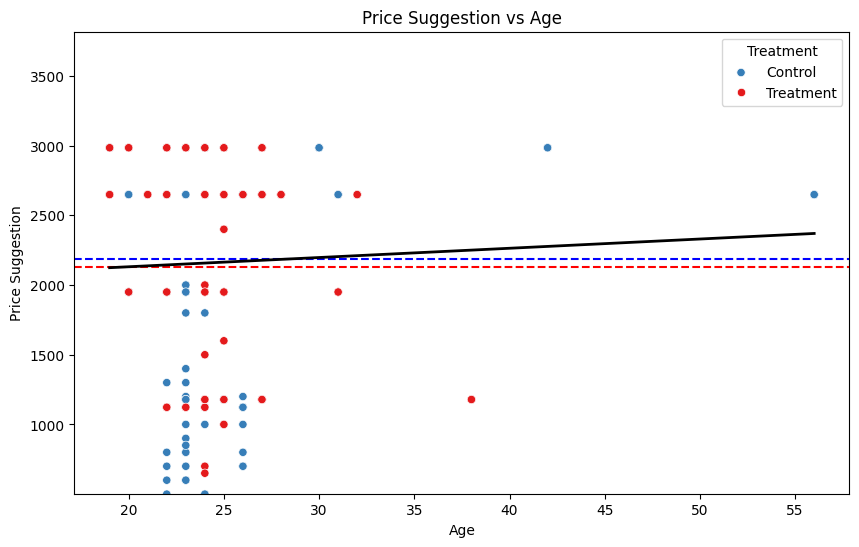

In [65]:
# Calculating mean price suggestion for control and treatment groups
control_mean = updated_df[updated_df['treatment'] == 0]['Q3_price_suggestion'].mean()
treatment_mean = updated_df[updated_df['treatment'] == 1]['Q3_price_suggestion'].mean()

# Scatter plot for Age vs Q3_price_suggestion with treatment as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=updated_df, x='age', y='Q3_price_suggestion', hue='treatment', palette='Set1')

# Adding regression line
sns.regplot(data=updated_df, x='age', y='Q3_price_suggestion', scatter=False, color='black', line_kws={"linewidth":2},ci=None)

# Add lines for mean price suggestion of control and treatment groups
plt.axhline(y=control_mean, color='blue', linestyle='--', label='Control Mean', zorder=1)
plt.axhline(y=treatment_mean, color='red', linestyle='--', label='Treatment Mean', zorder=1)

# Set y-axis limits to include mean values
y_min = min(control_mean, treatment_mean) - 1630
y_max = max(control_mean, treatment_mean) + 1630
plt.ylim(y_min, y_max)

plt.title('Price Suggestion vs Age')
plt.xlabel('Age')
plt.ylabel('Price Suggestion')
plt.legend(title='Treatment', labels=['Control', 'Treatment'], loc='upper right')
plt.show()

### Scatterplot for Price Suggestion vs Rent Budget with the regression line

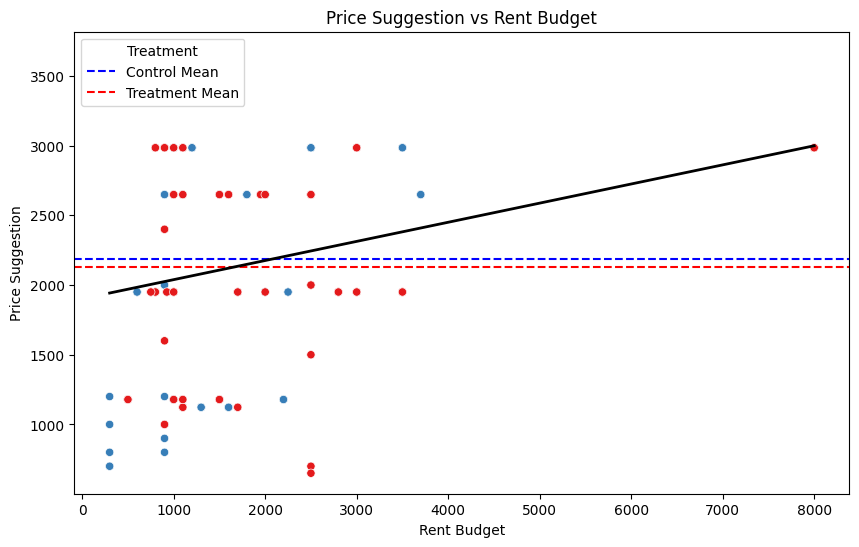

In [66]:
# Reset index of the DataFrame
updated_df.reset_index(drop=True, inplace=True)

# Calculate mean price suggestion for control and treatment groups
control_mean = updated_df[updated_df['treatment'] == 0]['Q3_price_suggestion'].mean()
treatment_mean = updated_df[updated_df['treatment'] == 1]['Q3_price_suggestion'].mean()

# Scatter plot for Rent Budget vs Price Suggestion with treatment as hue
plt.figure(figsize=(10, 6))

# Scatter plot with hue
sns.scatterplot(data=updated_df, x='rent_budget', y='Q3_price_suggestion', hue='treatment', palette='Set1', legend=False)

# Add regression line without the shaded area
sns.regplot(data=updated_df, x='rent_budget', y='Q3_price_suggestion', scatter=False, color='black', line_kws={"linewidth":2}, ci=None)

# Add lines for mean price suggestion of control and treatment groups
plt.axhline(y=control_mean, color='blue', linestyle='--', label='Control Mean', zorder=1)
plt.axhline(y=treatment_mean, color='red', linestyle='--', label='Treatment Mean', zorder=1)

# Set y-axis limits to include mean values
y_min = min(control_mean, treatment_mean) - 1630
y_max = max(control_mean, treatment_mean) + 1630
plt.ylim(y_min, y_max)

plt.title('Price Suggestion vs Rent Budget')
plt.xlabel('Rent Budget')
plt.ylabel('Price Suggestion')
plt.legend(title='Treatment', loc='upper left')
plt.show()
